# Learning a random linear binary classifier

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
sys.path.append('../')

In [3]:
import train
from linclass import LinearBinaryClassifier

## Creating data using a randomly choosen linear classifier

In [4]:
randomlc = LinearBinaryClassifier(2)

In [5]:
weights = np.array([ random.randint(0, 10) for i in range(2) ])
bias = random.randint(0, 10)

randomlc.set_params(weights, bias)

In [6]:
randomlc.get_params()

(array([2, 5]), 3)

In [7]:
X = []
Y = []
for i in range(100):
    x = [random.randint(-100, 100) for i in range(2)]
    y = randomlc.classify(x)
    X.append(x)
    Y.append(y)
data = { 'x': X, 'y': Y }

### Plotting the data

In [8]:
def plot(data, lc=None):
    data_size = len(data['x'])
    x_0 = [ data['x'][i][0] for i in range(data_size) if data['y'][i] == 0 ]
    y_0 = [ data['x'][i][1] for i in range(data_size) if data['y'][i] == 0 ]
    x_1 = [ data['x'][i][0] for i in range(data_size) if data['y'][i] == 1 ]
    y_1 = [ data['x'][i][1] for i in range(data_size) if data['y'][i] == 1 ]
    
    plt.plot(x_0, y_0, 'xb')
    plt.plot(x_1, y_1, 'og', fillstyle='none')
    
    if lc is not None:
        x, y = lc.line(np.concatenate((x_0, x_1)))
        plt.plot(x, y, color='cyan')

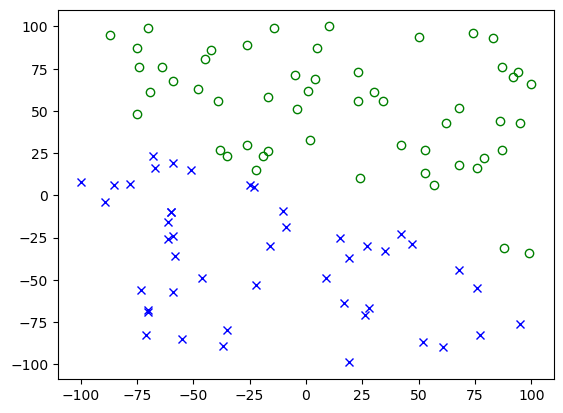

In [9]:
plot(data)

## Finding a linear classifier using the perceptron algorithm

In [10]:
perceptronlc = LinearBinaryClassifier(2)

In [11]:
perceptronlc.get_params()

(array([0., 0.]), 0.0)

In [12]:
print(f"Error before training: {perceptronlc.eval(data)}")

Error before training: 0.54


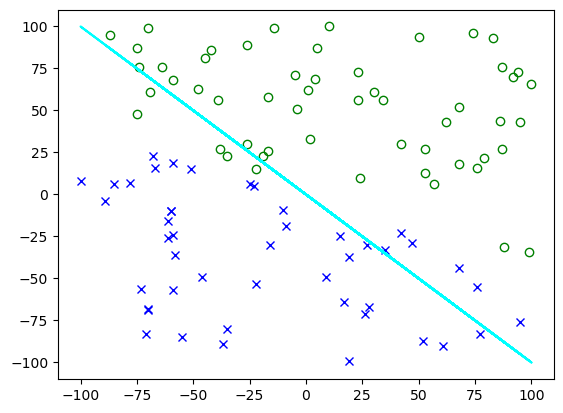

In [13]:
plot(data, perceptronlc)

In [14]:
train.perceptron(perceptronlc, data)

In [15]:
perceptronlc.get_params()

(array([ 57., 132.]), -1.0)

In [16]:
print(f"Error after training: {perceptronlc.eval(data)}")

Error after training: 0.0


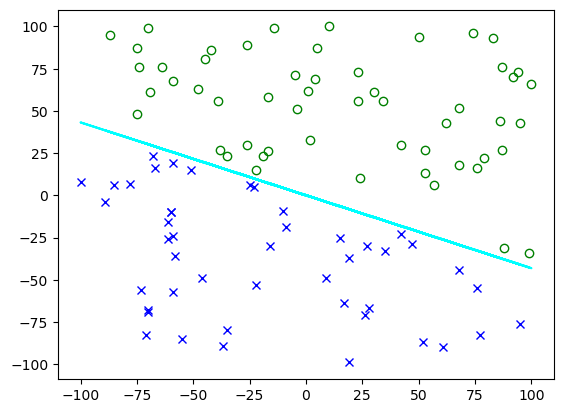

In [17]:
plot(data, perceptronlc)